# TD3 - Random Variables and Probability Distributions

## Exercise 1: Heads or tails?

In [25]:
import numpy as np
import matplotlib.pyplot as plt


## Exercise 2: Probability Distribution for Discrete Random Variables

### One Dice

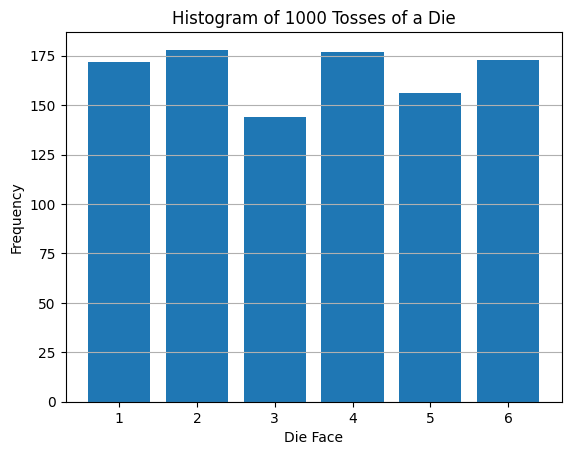

In [26]:
def toss_dice(n):
    """
    Simulate tossing a die n times and return the results as a list.
    
    :param n: Number of times to toss the die
    :return: List of results from tossing the die
    """
    return np.random.randint(1, 7, size=n).tolist()

def show_histogramm(x, title):
    """
    Display a histogram of the results.
    
    :param x: List of results to plot
    :param title: Title of the histogram
    """
    x = np.array(x)  # Ensure x is a NumPy array
    unique_values = np.unique(x)
    counts = np.bincount(x, minlength=max(x)+1)
    
    # Use only the counts for values that actually appear in x
    plt.bar(unique_values, counts[unique_values])
    plt.xlabel('Dice Sum' if min(x) >= 2 else 'Die Face')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y')
    plt.show()
    
show_histogramm(toss_dice(1000), 'Histogram of 1000 Tosses of a Die')


### Two dices

The probabilities for the sum of two dice rolls are as follows: $\forall k \in [|2,12|],~~P(k) =  $ 

[6, 9, 6, 3, 6, 8, 3, 7, 6, 10, 10, 5, 6, 3, 9, 8, 7, 11, 8, 10, 5, 7, 7, 7, 9, 12, 11, 12, 7, 6, 9, 10, 8, 4, 3, 7, 8, 6, 6, 8, 9, 6, 3, 6, 9, 10, 9, 5, 6, 11, 8, 6, 4, 8, 7, 8, 2, 4, 5, 5, 4, 9, 8, 7, 7, 6, 2, 9, 9, 4, 12, 12, 6, 8, 10, 9, 8, 7, 7, 9, 5, 6, 9, 4, 4, 3, 8, 10, 11, 6, 6, 8, 10, 7, 2, 3, 9, 10, 8, 10, 9, 3, 5, 7, 5, 7, 11, 4, 9, 8, 9, 11, 7, 9, 6, 7, 6, 8, 8, 11, 5, 5, 9, 7, 6, 8, 5, 9, 7, 5, 7, 5, 8, 7, 8, 10, 8, 12, 6, 7, 7, 7, 7, 10, 10, 6, 8, 9, 8, 7, 9, 6, 2, 8, 5, 9, 8, 5, 5, 8, 8, 10, 6, 5, 3, 7, 9, 8, 8, 5, 10, 10, 3, 3, 6, 7, 9, 7, 7, 7, 8, 8, 3, 10, 7, 5, 5, 7, 9, 11, 11, 3, 3, 5, 9, 5, 7, 7, 5, 7, 11, 4, 7, 2, 8, 10, 9, 7, 3, 9, 5, 9, 9, 8, 5, 6, 4, 4, 9, 7, 4, 9, 8, 7, 6, 6, 7, 3, 10, 7, 3, 10, 8, 8, 9, 7, 6, 5, 6, 8, 12, 7, 6, 5, 9, 7, 3, 7, 2, 3, 9, 11, 9, 6, 9, 5, 9, 8, 8, 5, 2, 6, 3, 2, 9, 9, 7, 8, 7, 12, 12, 9, 5, 11, 12, 6, 8, 8, 10, 5, 7, 8, 6, 7, 7, 12, 9, 8, 5, 7, 9, 6, 7, 5, 8, 4, 4, 5, 9, 4, 10, 10, 8, 8, 5, 7, 8, 8, 9, 9, 11, 5, 11, 2, 9, 5, 3, 6

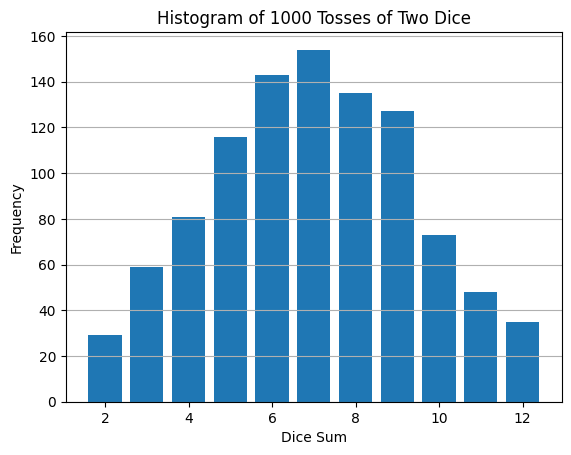

In [ ]:

dice1 = toss_dice(1000)
dice2 = toss_dice(1000)

result = [a + b for a, b in zip(dice1, dice2)]

show_histogramm(result, 'Histogram of 1000 Tosses of Two Dice')




### Mean and variance

The mean and variance formulas are : 
$\mathbb E(X) = \sum_{x \in \Omega_x} x\cdot P(x)$
    and     
$\sigma^2_X = V(X) = \sum_{x \in \Omega_x} [x - \mathbb E(X)]^2 \cdot P(x)$

Here we are supposed to get $\mathbb E(X) = 3.5$ and $V(X) = 3$ avec X le lancé d'un dé


In [28]:
def mean(x):
    """
    Calculate the mean of a list of numbers.
    
    :param x: List of numbers
    :return: Mean of the numbers
    """
    return sum(x) / len(x) if len(x) > 0 else 0

def variance(x):
    """
    Calculate the variance of a list of numbers.
    
    :param x: List of numbers
    :return: Variance of the numbers
    """
    m = mean(x)
    return sum((i - m) ** 2 for i in x) / len(x) if len(x) > 0 else 0


print('Mean of 1000 Tosses of a Die:', mean(dice1))
print('Variance of 1000 Tosses of a Die:', variance(dice1))
print('Mean of 1000 Tosses of Two Dice:', mean(result))
print('Variance of 1000 Tosses of Two Dice:', variance(result))


Mean of 1000 Tosses of a Die: 3.447
Variance of 1000 Tosses of a Die: 3.0871910000000002
Mean of 1000 Tosses of Two Dice: 6.976
Variance of 1000 Tosses of Two Dice: 5.947424


### Correlation

Correlation coef: 0.8215490645782205


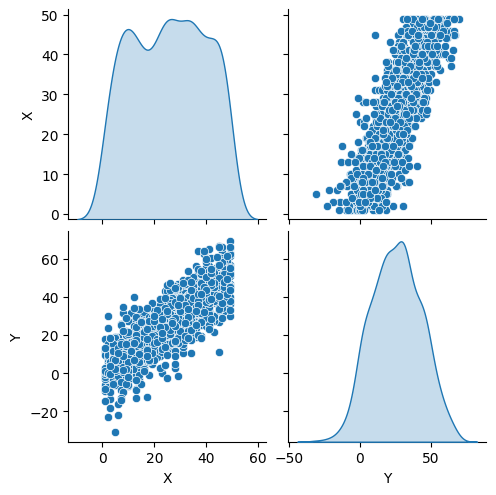

In [49]:
import seaborn as sns
import pandas as pd
def generate_X(n):
    """
    Generate a list of n random numbers from a normal distribution.
    
    :param n: Number of random numbers to generate
    :return: List of random numbers
    """
    return np.random.randint(1, 50, size=n).tolist()

def compute_Y(X):
    """
    Compute the Y values based on the X values.
    
    :param X: List of X values
    :return: List of Y values
    """
    
    return np.array(X) + np.random.normal(0, 10, size=len(X)).tolist()

def double_histogramm(X, Y, title):
    """
    Display a histogram of X and Y values.
    
    :param X: List of X values
    :param Y: List of Y values
    :param title: Title of the histogram
    """
    plt.hist(X, bins=30, alpha=0.5, label='X', color='blue')
    plt.hist(Y, bins=30, alpha=0.5, label='Y', color='red')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.grid(axis='y')
    plt.show()
    
X = generate_X(1000)
Y = compute_Y(X)
# double_histogramm(X, Y, 'Histogram of X and Y Values')


print('Correlation coef:', np.corrcoef(X, Y)[0,1])

sns.pairplot(pd.DataFrame({'X': X, 'Y': Y}), diag_kind='kde')



### Analysis 

Here we have a very strongly correlated variable. Y is simply X with noise on top of it. To obtain no correlation we would need to remove X from Y. To obtain negative correlation we would need to substract X to the normal law. 

Correlation coef: -0.010058476542080641


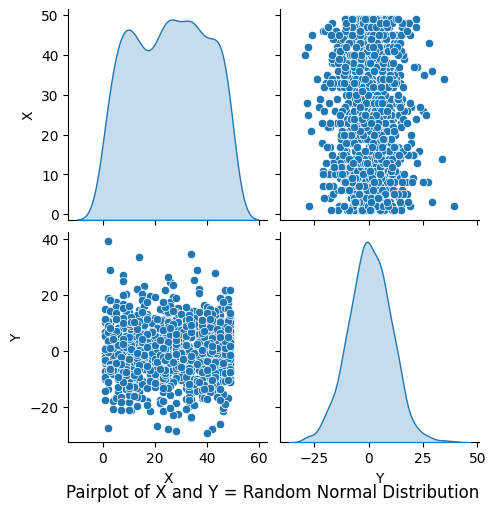

Correlation coef: -0.8068336944021488


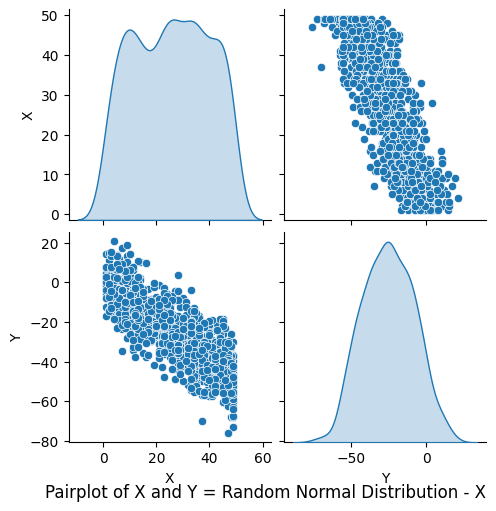

In [67]:

# No correlation Y is just a random normal distribution 
Y = np.random.normal(0, 10, size=len(X)).tolist()
sns.pairplot(pd.DataFrame({'X': X, 'Y': Y}), diag_kind='kde')
plt.title('Pairplot of X and Y = Random Normal Distribution', y = -0.3, loc='right')
print('Correlation coef:', np.corrcoef(X, Y)[0,1])
plt.show()

# Negative correlation Y = Random Normal Distribution - X
Y = np.random.normal(0, 10, size=len(X)).tolist() - np.array(X)
sns.pairplot(pd.DataFrame({'X': X, 'Y': Y}), diag_kind='kde')
plt.title('Pairplot of X and Y = Random Normal Distribution - X', y = -0.3, loc='right')
print('Correlation coef:', np.corrcoef(X, Y)[0,1])
plt.show()


## Exercise 3: Correlation Coefficient for Continuous Random Variables

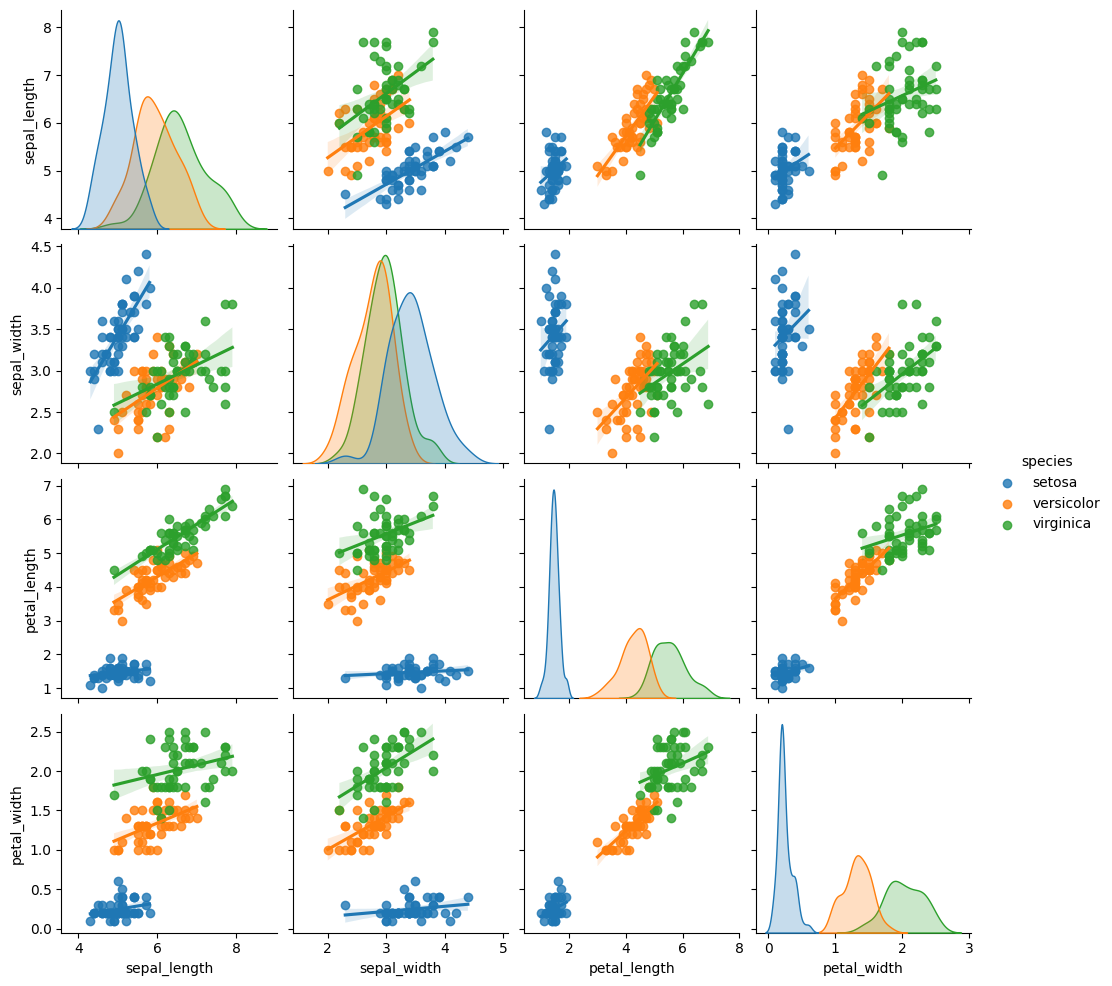

In [ ]:

iris = sns.load_dataset('iris')

sns.pairplot(iris, hue='species', diag_kind='kde', kind="reg")


### Analysis

The most correalted 

## Exercise 4: Calculating probabilities of events for different laws


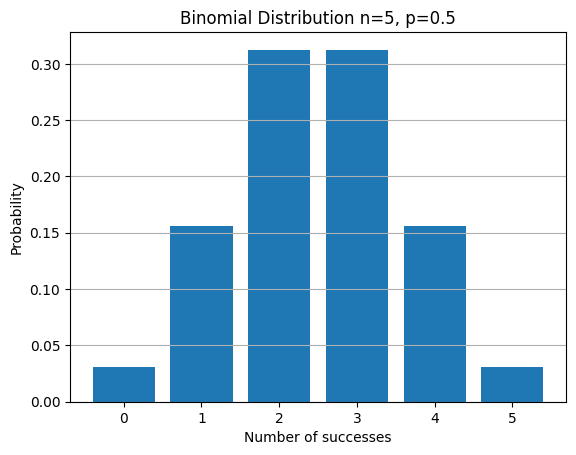

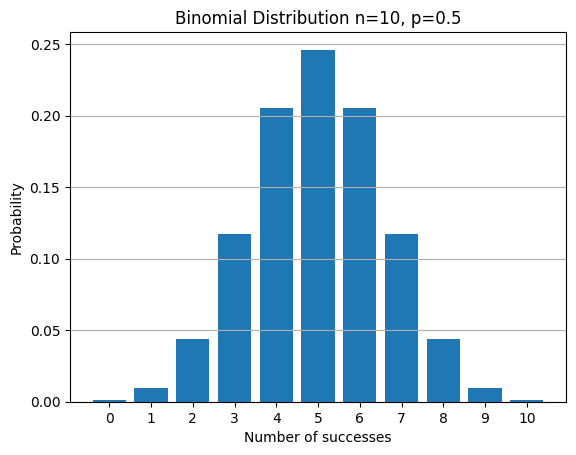

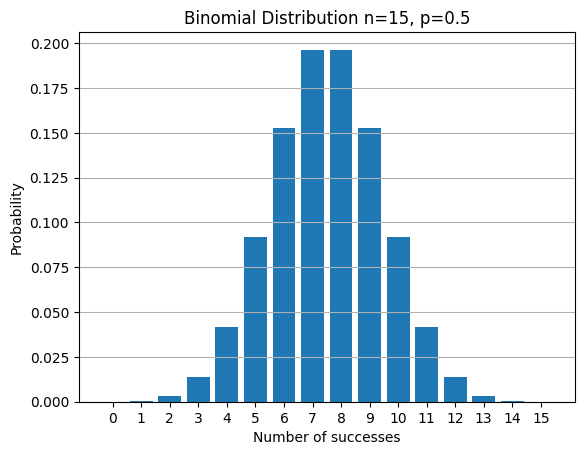

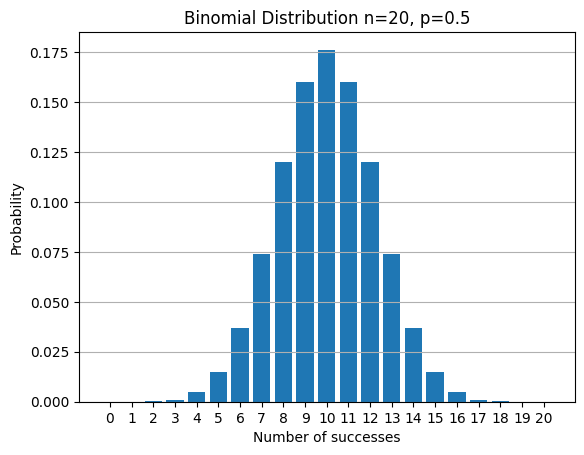

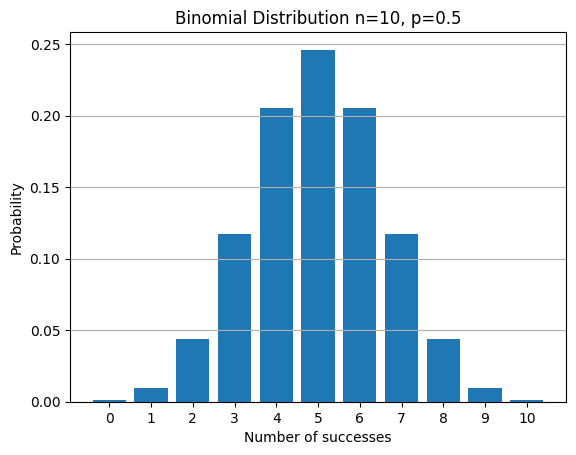

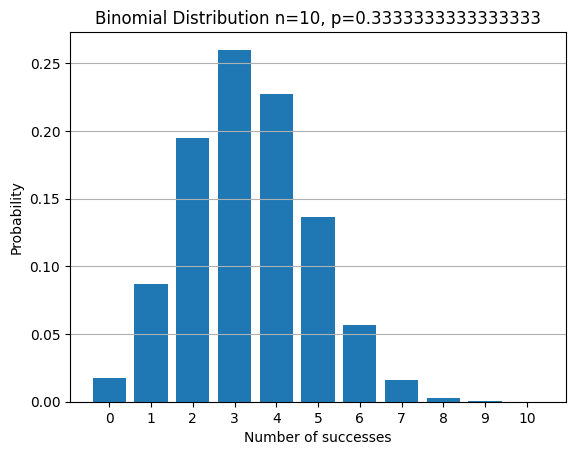

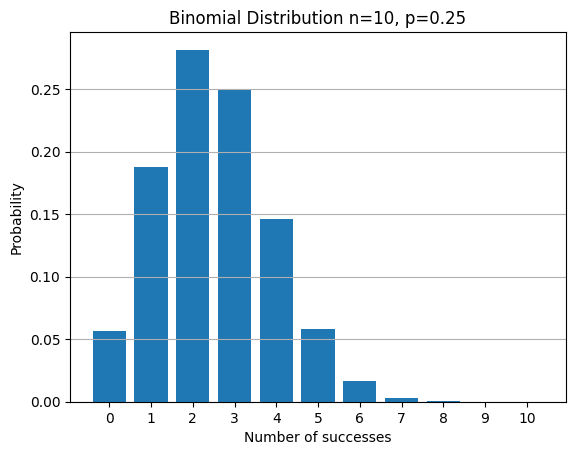

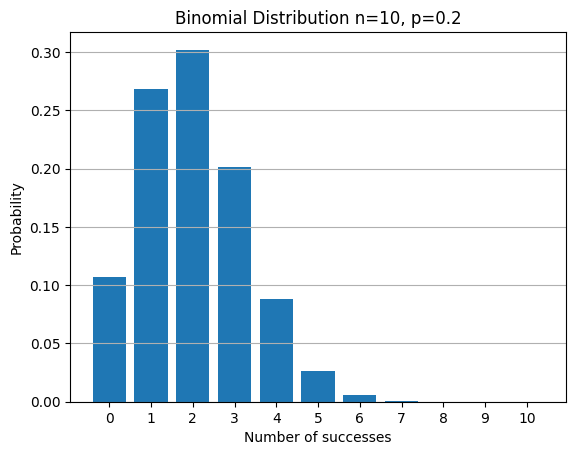

In [72]:
import scipy.special as sp
def plot_binomiale(n,p):
    """
    Plot the binomial distribution for given n and p.
    
    :param n: Number of trials
    :param p: Probability of success
    """
    x = np.arange(0, n+1)
    y = (sp.factorial(n) / (sp.factorial(x) * sp.factorial(n - x))) * (p ** x) * ((1 - p) ** (n - x))
    plt.bar(x, y)
    plt.xlabel('Number of successes')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution n={n}, p={p}')
    plt.xticks(x)
    plt.grid(axis='y')
    plt.show()
    
    
plot_binomiale(5, 0.5)
plot_binomiale(10, 0.5)
plot_binomiale(15, 0.5)
plot_binomiale(20, 0.5)

plot_binomiale(10, 1/2)
plot_binomiale(10, 1/3)
plot_binomiale(10, 1/4)
plot_binomiale(10, 1/5)

